# Numeric optimization in logistic regression

Numeric optimization in the context of logistic regression refers to the process of finding the optimal values for the parameters of the logistic regression model through numerical methods. Logistic regression is a statistical model used for binary classification, where the goal is to predict the probability that an instance belongs to a particular class.

## Team members:

1. Project manager - Adema
2. Technical writer - Daulet
3. Author of executable content - Meiram Sopy
4. Designer of interative plots - Amina
5. Designer of quizzes - Adilzhan

Link of the book [here](https://headsman-4899.github.io/Numeric_optimization_for_logistic_regression/intro.html)

To find the optimal weights of the logistic regression, we can use {prf:ref}`gradient descent <GD>` algorithm. To apply this algorithm, one need to calculate the gradient of the loss function.

## Binary logistic regression

Multiply the loss function {eq}`bin-log-reg-loss` by $n$:

$$
\mathcal L(\boldsymbol w) = 
-\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
$$

To find $\nabla \mathcal L(\boldsymbol w)$ observe that

$$
   \nabla \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) = \frac {\nabla \sigma(\boldsymbol x_i^\top \boldsymbol w)}{\sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{\sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

Also,

$$
   \nabla \log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)) = -\frac {\nabla  \sigma(\boldsymbol x_i^\top \boldsymbol w)}{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

**Q**. What is $\nabla(\boldsymbol x_i^\top \boldsymbol w)$?

Putting it altogeter, we get

$$
   \nabla \mathcal L(\boldsymbol w) = -\sum\limits_{i=1}^n \big(y_i(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\boldsymbol x_i - (1-y_i)\sigma(\boldsymbol x_i^\top \boldsymbol w)\boldsymbol x_i\big) = \sum\limits_{i=1}^n (\sigma(\boldsymbol x_i^\top \boldsymbol w) - y_i)\boldsymbol x_i.
$$

````{admonition} Question
:class: important
How to write $\nabla \mathcal L(\boldsymbol w)$ as a product of a matrix and a vector, avoiding the explicit summation?

```{hint}
:class: dropdown
The shape of $\nabla \mathcal L(\boldsymbol w)$ is the same as of $\boldsymbol w$, i.e., $d\times 1$. Now observe that

$$
   \begin{pmatrix}
   \sigma(\boldsymbol x_1^\top \boldsymbol w) - y_1 \\
   \vdots \\
   \sigma(\boldsymbol x_n^\top \boldsymbol w) - y_n
   \end{pmatrix}
   = \sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y \in \mathbb R^n.
$$

What should we multiply by this vector to obtain $\nabla \mathcal L$?
```
````

````{admonition} Question
:class: important
 What is hessian $\nabla^2 L(\boldsymbol w)$?

```{admonition} Answer
:class: tip, dropdown
$$
\nabla^2 L(\boldsymbol w) = \boldsymbol X^\top \boldsymbol S \boldsymbol X,
$$

where

$$
   \boldsymbol S = \mathrm{diag}\{\sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y\} = \begin{pmatrix}
   \sigma(\boldsymbol x_1^{\boldsymbol{\top}} \boldsymbol w) - y_1  & \ldots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \ldots & \sigma(\boldsymbol x_n^{\boldsymbol{\top}} \boldsymbol w) - y_n
   \end{pmatrix}
$$
```
````

## Breast cancer dataset: numeric optimization 

Fetch the dataset:

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

Apply the {prf:ref}`gradient descent <GD>` algorithm to the logistic regression:

In [ ]:
import numpy as np
from scipy.special import expit

def logistic_regression_gd(X, y, C=1, learning_rate=0.01, tol=1e-3, max_iter=10000):
    w = np.random.normal(size=X.shape[1])
    gradient = X.T.dot(expit(X.dot(w)) - y) + C * w
    for i in range(max_iter):
        if np.linalg.norm(gradient) <= tol:
            return w
        w -= learning_rate * gradient
        gradient = X.T.dot(expit(X.dot(w)) - y) + C * w
    print("max_iter exceeded")
    return w

Fit the logistic regresion on the whole dataset:

In [ ]:
%time w = logistic_regression_gd(X, y, learning_rate=2e-7, max_iter=10**6)
w

max_iter exceeded
CPU times: user 1min 1s, sys: 5.17 s, total: 1min 6s
Wall time: 36.7 s


array([ 2.07357527,  0.31060659,  0.6663033 , -0.02618116,  0.08298685,
       -0.96314197, -1.15776337, -0.94432551, -0.76477366,  0.15558787,
       -0.19618218,  1.11058726, -1.01542852, -0.12326595,  0.06391155,
       -0.10387021,  0.35510887,  1.54255196, -0.90647454, -0.12195762,
        1.65596306, -0.68388714, -0.4705366 , -0.04170157,  0.1577867 ,
        0.57481927, -0.57937639, -0.2332493 ,  1.25820274, -0.39930211])

Calculate the accuracy score:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expit(X.dot(w)) > 0.5, y)

0.9490333919156415

Compare with `sklearn`:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, max_iter=5000)
log_reg.fit(X, y)
print(log_reg.score(X, y))
print(accuracy_score(log_reg.predict(X), y))
log_reg.coef_

0.9595782073813708
0.9595782073813708


array([[ 2.18332329,  0.11789056, -0.0696952 , -0.00350176, -0.16519865,
        -0.4118028 , -0.67385012, -0.36497435, -0.23983217, -0.02406538,
        -0.02186803,  1.20613335,  0.04838948, -0.0970984 , -0.01870574,
         0.01626219, -0.03861864, -0.04276028, -0.04322983,  0.00846606,
         1.29672397, -0.34212421, -0.12576754, -0.02460068, -0.30612789,
        -1.14244163, -1.62895872, -0.6992171 , -0.72520831, -0.11275416]])

In [ ]:
np.linalg.norm(w - log_reg.coef_)

3.9143604758471366

## Multinomial logistic regression

Recall that the loss function in this case is

$$
    \begin{multline*}
    \mathcal L(\boldsymbol W) = -\sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\boldsymbol x_i^\top\boldsymbol w_{k} -\log\Big(\sum\limits_{k=1}^K \exp(\boldsymbol x_i^\top\boldsymbol w_{k})\Big)\bigg) = \\
    =
    -\sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\sum\limits_{j=1}^d x_{ij} w_{jk} -\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg)
    \end{multline*}
$$

One can show that 

$$
    \nabla \mathcal L(\boldsymbol W) = \boldsymbol X^\top (\boldsymbol {\widehat Y} - \boldsymbol Y) = \boldsymbol X^\top ( \sigma(\boldsymbol{XW}) - \boldsymbol Y).
$$

<!-- Observe that

$$
    \frac{\partial}{\partial w_{pq}} (x_{ij} w_{jk}) = x_{ij} \delta_{pj} \delta_{qk},
$$

$$
\frac{\partial}{\partial w_{pq}}\bigg(\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg) = \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}
$$

Hence, 

$$
    \frac{\partial \mathcal L}{\partial w_{pq}} = \sum\limits_{i=1}^n \sum\limits_{k=1}^K y_{ik}\bigg(\sum\limits_{j=1}^d  \bigg(  x_{ij} \delta_{pj} \delta_{qk} - \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}\bigg)\bigg)
$$ -->

# Introduction

For binary classification issues, logistic regression is a potent statistical technique. Logistic regression predicts the likelihood that an instance falls into a certain category as opposed to linear regression, which forecasts continuous values. Because of this, it's especially helpful in situations when the target variable is binary, meaning it can have two alternative values.

## Overview

The link between one or more independent variables ($ X $) and the likelihood of a specific result ($ Y $) is modeled using logistic regression. The foundation of logistic regression is the logistic function, sometimes referred to as the sigmoid function. The definition of the sigmoid function is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

When the linear combination of the input characteristics and model parameters is represented by $ z $:

$$ z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

The coefficients to be learned from the training set are $\beta_0, \beta_1, \ldots, \beta_n $.

## Key Concepts

### Probability and Odds

The probability ($ P $) that an instance belongs to the positive class is modeled by logistic regression. The odds of a favorable outcome are represented by the odds ratio ($ \frac{P}{1-P} $).

### Log-Odds (Logit)

The log-odds or logit function is used to map the odds to a continuous range:

$$ \ln\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

### Decision Boundary

In logistic regression, an important concept is the decision border. The hypersurface is the one that divides the instances into several classes. The decision boundary for a binary classification issue is given by the equation $ z = 0 $, which is equivalent to $\sigma(z) = 0.5 $.

## Training Logistic Regression

Finding the ideal values for the coefficients ($\beta$) that maximize the likelihood of the observed data is the first step in training a logistic regression model. Usually, numerical optimization techniques like Newton's method or gradient descent are used for this.

Quiz

In [2]:
from jupyterquiz import display_quiz
import json
from base64 import b64encode

def get_spanned_encoded_q(q, q_name):
    byte_code = b64encode(bytes(json.dumps(q), 'utf8'))
    return f'<span style="display:none" id="{q_name}">{byte_code.decode()}</span>'

In [3]:
#Introduction to Logistic Regression
q_introduction_logistic_regression = [
    {
        "question": "What function serves as the foundation of logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Sine function",
                "correct": False,
                "feedback": "Incorrect. The foundation of logistic regression is the logistic function or sigmoid function, not the sine function."
            },
            {
                "answer": "Logistic function (Sigmoid function)",
                "correct": True,
                "feedback": "Correct! Logistic regression is based on the logistic function, often referred to as the sigmoid function."
            },
            {
                "answer": "Exponential function",
                "correct": False,
                "feedback": "Incorrect. The key function in logistic regression is the logistic function, not the exponential function."
            },
            {
                "answer": "Linear function",
                "correct": False,
                "feedback": "Incorrect. Logistic regression is based on the logistic function, not a linear function."
            }
        ]
    },
    {
        "question": "If the linear combination of input characteristics and model parameters (z) in logistic regression is represented as z = β0 + β1X1 + β2X2 + ... + βnXn, what is the expression for the logistic function (σ(z))? Please provide your answer in a numeric form.",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 1,
                "correct": True,
                "feedback": "Correct! The logistic function (σ(z)) is expressed as 1 / (1 + e^(-z)). In this case, it simplifies to 1 / (1 + e^(-1)), which is equal to approximately 0.731."
            },
            {
                "type": "default",
                "feedback": "Incorrect. Please review the logistic function (σ(z)) and try again."
            }
        ]
    }
]

# Display the questions
display_quiz(q_introduction_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_introduction_logistic_regression, "q_introduction_logistic_regression")


<IPython.core.display.Javascript object>

'<span style="display:none" id="q_introduction_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBmdW5jdGlvbiBzZXJ2ZXMgYXMgdGhlIGZvdW5kYXRpb24gb2YgbG9naXN0aWMgcmVncmVzc2lvbj8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlNpbmUgZnVuY3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgZm91bmRhdGlvbiBvZiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiBvciBzaWdtb2lkIGZ1bmN0aW9uLCBub3QgdGhlIHNpbmUgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkxvZ2lzdGljIGZ1bmN0aW9uIChTaWdtb2lkIGZ1bmN0aW9uKSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIExvZ2lzdGljIHJlZ3Jlc3Npb24gaXMgYmFzZWQgb24gdGhlIGxvZ2lzdGljIGZ1bmN0aW9uLCBvZnRlbiByZWZlcnJlZCB0byBhcyB0aGUgc2lnbW9pZCBmdW5jdGlvbi4ifSwgeyJhbnN3ZXIiOiAiRXhwb25lbnRpYWwgZnVuY3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUga2V5IGZ1bmN0aW9uIGluIGxvZ2lzdGljIHJlZ3Jlc3Npb24gaXMgdGhlIGxvZ2lzdGljIGZ1bmN0aW9uLCBub3QgdGhlIGV4cG9uZW50aWFsIGZ1bmN0aW9uLiJ9LCB7ImFuc3dlciI6ICJMaW5lYXIgZnVuY3Rpb24iLCAiY29ycmVj

# Cost Function

The cost function in logistic regression is an essential tool for calculating the discrepancy between the actual labels and the predicted probabilities. Finding the best values for the model parameters involves minimizing this cost function, which is the aim of logistic regression.

## Sigmoid Function

An essential part of logistic regression is the logistic or sigmoid function. It has the following definition:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $ z $ represents the linear combination of the model's parameters and input features:

$$ z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

The coefficients that need to be learned in this case are $\beta_0, \beta_1, \ldots, \beta_n $.

## Probability and Odds

The probability ($ P $) that an instance belongs to the positive class is predicted by the logistic regression model. The odds of a positive outcome are represented by the odds ratio ($ \frac{P}{1-P} $).

## Log-Odds (Logit)

The log-odds or logit function is used to map the odds to a continuous range:

$$ \ln\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

## Binary Cross-Entropy Loss

The binary cross-entropy loss is a common way to represent the cost function in logistic regression. It is provided by: for a single training example.

$$ J(\theta) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right] $$

where $ \hat{y} $ is the expected probability and $ y $ is the actual label (0 or 1).

## Cost Function for the Entire Dataset

The overall cost function for the full dataset with $ m $ training examples is the mean of the individual costs:

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[ y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)}) \right] $$

## Minimizing the Cost Function

Finding the parameter values ($ \beta $) that minimize the cost function is the aim of the training process. Numerical optimization techniques like gradient descent, Newton's method, or stochastic gradient descent are commonly used to accomplish this.

## Definition

The cost function for logistic regression is defined as:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

Here, $ J(\theta) $ is the cost function, $ m $ is the number of training examples, $ y^{(i)} $ is the actual output for the $ i^{th} $ example, $ h_\theta(x^{(i)}) $ is the predicted output, and $ \theta $ represents the parameters of the model.

## Implementation

The provided script introduces the logistic regression cost function and furnishes a concise illustration of its application with randomly generated data. The logistic_regression_cost function is designed to accept the feature matrix XX, binary labels yy, and parameter vector θθ as arguments, facilitating the computation of the logistic regression cost. The ensuing segment exemplifies the practical implementation of the cost calculation using generated sample data.


In [5]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return cost

# Example usage
# Generate sample data
np.random.seed(42)
X_example = np.random.rand(100, 2)
X_example = np.c_[np.ones(X_example.shape[0]), X_example]  # Add intercept term
theta_example = np.random.rand(3)
y_example = np.random.randint(2, size=100)

# Calculate the cost
cost_example = logistic_regression_cost(X_example, y_example, theta_example)

# Print the result
print(f"Example Cost: {cost_example}")


Example Cost: 0.747281636626405


# Newton's Method

To determine the best values for the model parameters in logistic regression, Newton's Method is a potent optimization technique. In comparison to first-order techniques like gradient descent, this second-order optimization strategy offers faster convergence by combining data from the gradient and the Hessian matrix.

## Recap of Logistic Regression and the Cost Function

The relationship between input feature probability and a binary outcome is modeled by logistic regression. In logistic regression, the cost function is commonly represented by the binary cross-entropy loss:

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[ y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)}) \right] $$

The number of training examples is $ m $, the actual label is $ y^{(i)} $, and the predicted probability is $ \hat{y}^{(i)} $.

## Newton's Method Update Rule

Newton's Method uses the inverse of the Hessian matrix ($ H $) to update the parameters ($ \theta $). The following is the parameter update rule:

$$ \theta_{\text{new}} = \theta_{\text{old}} - H^{-1}(\theta_{\text{old}}) \nabla J(\theta_{\text{old}}) $$

where $ H $ is the Hessian matrix and $ \nabla J(\theta) $ is the cost function's gradient.

## Hessian Matrix for Logistic Regression

The definition of the logistic regression Hessian matrix is:

$$ H = \frac{1}{m}\sum_{i=1}^{m} \hat{y}^{(i)}(1-\hat{y}^{(i)}) \mathbf{x}^{(i)}(\mathbf{x}^{(i)})^T $$

The predicted probability in this case is $ \hat{y}^{(i)} $, and the feature vector for the $ i $-th example is $ \mathbf{x}^{(i)} $.

## Implementation

Let's implement Newton's method for logistic regression in Python:

### Install necessary libraries used for interactiveness on graphs

1. pip install plotly

2. pip install ipywidgets

In this example, the code uses the breast cancer dataset and performs logistic regression optimized by Newton's Method:


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#loading breast cancer dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],
                         columns=np.concatenate([cancer['feature_names'], ['target']]))

#for visualization
features = ['mean radius', 'mean texture']
cancer_df['target'] = np.where(cancer_df['target'] == 0, 0, 1)

#data prep
X = cancer_df[features]
y = cancer_df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#plot decision boundry
def plot_decisionboundary(X, y, features):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)

        trace = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                           marker=dict(color=y_pred, colorscale='Viridis', size=10,
                                       line=dict(color='black', width=0.5)),
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Logistic Regression Decision Boundary with Slider',
                      xaxis=dict(title=features[0]),
                      yaxis=dict(title=features[1]),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()



plot_decisionboundary(X_scaled, y, features)

# visualize confusion matrix 
def plot_confusionmatrix(X, y):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)
        conf_matrix = confusion_matrix(y > threshold, y_pred)

        trace = go.Heatmap(z=conf_matrix, zmin=0, zmax=len(X), colorscale='Viridis',
                           x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1'],
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Confusion Matrix with Slider',
                      xaxis=dict(title='Predicted Label'),
                      yaxis=dict(title='Actual Label'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()

plot_confusionmatrix(X_scaled, y)

Accuracy: 90.35%


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive
from sklearn.metrics import accuracy_score, roc_curve, auc

'''
# plot ROC curve 
def plot_roc_curve(X, y):
    thresholds = np.linspace(0.1, 0.9, 9)
    fig = go.Figure()

    for threshold in thresholds:
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred_prob = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_prob)
        auc_value = auc(fpr, tpr)

        trace = go.Scatter(x=fpr, y=tpr, mode='lines',
                           name=f'Threshold={threshold:.1f}, AUC={auc_value:.2f}')

        fig.add_trace(trace)

    fig.update_layout(title='ROC Curve with Slider',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()
'''

roc_curve_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description='Threshold:')


def update_roc_curve(threshold):
    model.fit(X_scaled, y > threshold)
    y_pred_prob = model.predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_value = auc(fpr, tpr)

    fig = go.Figure()

    trace = go.Scatter(x=fpr, y=tpr, mode='lines',
                       name=f'Threshold={threshold:.1f}, AUC={auc_value:.2f}')

    fig.add_trace(trace)

    fig.update_layout(title='ROC Curve with Slider',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'))

    fig.show()

# Create an interactive widget for the ROC curve with slider
interactive_plot_roc_curve = interactive(update_roc_curve, threshold=roc_curve_slider)

# Display the interactive plot
print("Adjust the threshold with the slider:")
interactive_plot_roc_curve

Adjust the threshold with the slider:


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=0.9, min=0.1), Output()), _dom_clas…

In [ ]:
#3D decision boundary
def plot_3d_decision_boundary(X, y, features):
    thresholds = np.linspace(0.1, 0.9, 9)
    fig = go.Figure()

    for threshold in thresholds:
        model = LogisticRegression()
        model.fit(X, y > threshold)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        trace = go.Surface(x=xx, y=yy, z=Z, opacity=0.5, showscale=False,
                           colorscale='Viridis', name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='3D Decision Boundary with Slider',
                      scene=dict(xaxis_title=features[0],
                                 yaxis_title=features[1],
                                 zaxis_title='Predicted Label'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['scene.camera', dict(up=dict(z=0, x=0, y=0)),
                                                      'scene.annotations', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()

#slider
decision_boundary_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description='Threshold:')


def update_3d_decision_boundary(threshold):
    model.fit(X_scaled, y > threshold)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = go.Figure()

    trace = go.Surface(x=xx, y=yy, z=Z, opacity=0.5, showscale=False,
                       colorscale='Viridis', name=f'Threshold={threshold:.1f}')

    fig.add_trace(trace)

    fig.update_layout(title='3D Decision Boundary with Slider',
                      scene=dict(xaxis_title=features[0],
                                 yaxis_title=features[1],
                                 zaxis_title='Predicted Label'))

    fig.show()


interactive_plot_3d_decision_boundary = interactive(update_3d_decision_boundary, threshold=decision_boundary_slider)


print("Adjust the threshold with the slider:")
interactive_plot_3d_decision_boundary

Adjust the threshold with the slider:


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=0.9, min=0.1), Output()), _dom_clas…

In [ ]:
# Newton’s Method in Logistic Regression
q_newtons_method_logistic_regression = [
    {
        "question": "In the context of Newton's Method for logistic regression, if the Hessian matrix is a 3x3 matrix, how many second-order partial derivatives are involved?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 6,
                "correct": True,
                "feedback": "Correct! In a 3x3 Hessian matrix, there are 6 second-order partial derivatives."
            },
            {
                "type": "range",
                "range": [0, 5],
                "correct": False,
                "feedback": "Incorrect. The number of second-order partial derivatives in a 3x3 Hessian matrix is greater than the specified range."
            },
            {
                "type": "value",
                "value": 9,
                "correct": False,
                "feedback": "Incorrect. The number of second-order partial derivatives is not equal to the square of the matrix dimension."
            },
            {
                "type": "default",
                "feedback": "Please provide a numerical answer."
            }
        ]
    },
    {
        "question": "What is the primary objective of Newton's Method in logistic regression optimization?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To maximize the cost function",
                "correct": False,
                "feedback": "Incorrect. Newton's Method aims to minimize the cost function."
            },
            {
                "answer": "To minimize the cost function",
                "correct": True,
                "feedback": "Correct! Newton's Method is used for fast convergence in minimizing the cost function."
            },
            {
                "answer": "To find the global maximum of the cost function",
                "correct": False,
                "feedback": "Incorrect. Newton's Method searches for the global minimum of the cost function."
            },
            {
                "answer": "To perform feature scaling",
                "correct": False,
                "feedback": "Incorrect. Newton's Method is focused on optimizing parameters, not feature scaling."
            }
        ]
    },
    {
        "question": "What does the Hessian matrix represent in Newton's Method for logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The cost function",
                "correct": False,
                "feedback": "Incorrect. The Hessian matrix is related to the curvature of the cost function."
            },
            {
                "answer": "The second-order partial derivatives of the cost function",
                "correct": True,
                "feedback": "Correct! The Hessian matrix involves second-order partial derivatives of the cost function."
            },
            {
                "answer": "The gradient of the cost function",
                "correct": False,
                "feedback": "Incorrect. The gradient is different from the Hessian matrix in Newton's Method."
            },
            {
                "answer": "The feature vectors",
                "correct": False,
                "feedback": "Incorrect. The Hessian matrix is not related to feature vectors in this context."
            }
        ]
    },
    {
        "question": "How does Newton's Method update the parameters in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Using the first-order partial derivatives",
                "correct": False,
                "feedback": "Incorrect. Newton's Method involves second-order partial derivatives for updating parameters."
            },
            {
                "answer": "By directly modifying the learning rate",
                "correct": False,
                "feedback": "Incorrect. Newton's Method does not directly modify the learning rate like gradient descent."
            },
            {
                "answer": "Using the inverse of the Hessian matrix and the cost function's gradient",
                "correct": True,
                "feedback": "Correct! Newton's Method uses both the Hessian matrix and the gradient for parameter updates."
            },
            {
                "answer": "By performing stochastic updates on the parameters",
                "correct": False,
                "feedback": "Incorrect. Stochastic updates are more typical in techniques like stochastic gradient descent, not Newton's Method."
            }
        ]
    }
]

# Display the questions
display_quiz(q_newtons_method_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_newtons_method_logistic_regression, "q_newtons_method_logistic_regression")


<IPython.core.display.Javascript object>

'<span style="display:none" id="q_newtons_method_logistic_regression">W3sicXVlc3Rpb24iOiAiSW4gdGhlIGNvbnRleHQgb2YgTmV3dG9uJ3MgTWV0aG9kIGZvciBsb2dpc3RpYyByZWdyZXNzaW9uLCBpZiB0aGUgSGVzc2lhbiBtYXRyaXggaXMgYSAzeDMgbWF0cml4LCBob3cgbWFueSBzZWNvbmQtb3JkZXIgcGFydGlhbCBkZXJpdmF0aXZlcyBhcmUgaW52b2x2ZWQ/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDYsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIEluIGEgM3gzIEhlc3NpYW4gbWF0cml4LCB0aGVyZSBhcmUgNiBzZWNvbmQtb3JkZXIgcGFydGlhbCBkZXJpdmF0aXZlcy4ifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzAsIDVdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgbnVtYmVyIG9mIHNlY29uZC1vcmRlciBwYXJ0aWFsIGRlcml2YXRpdmVzIGluIGEgM3gzIEhlc3NpYW4gbWF0cml4IGlzIGdyZWF0ZXIgdGhhbiB0aGUgc3BlY2lmaWVkIHJhbmdlLiJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA5LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgbnVtYmVyIG9mIHNlY29uZC1vcmRlciBwYXJ0aWFsIGRlcml2YXRpdmVzIGlzIG5vdCBlcXVhbCB0byB0aGUgc3F1YXJlIG9mIHRoZSBtYXRyaXggZGltZW

# Gradient Descent

Gradient Descent is a fundamental optimization algorithm used in logistic regression to minimize the cost function and find optimal values for the model parameters. This iterative optimization technique adjusts the parameters in the direction of the steepest decrease in the cost function.

## Cost Function Recap

The binary cross-entropy loss is a common way to represent the cost function in logistic regression. For a single training example, it is given by:

$$ J(\theta) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right] $$

where $ \hat{y} $ is the expected probability and $ y $ is the actual label (0 or 1).

## Derivation of the Gradient

The gradient of the cost function with respect to the parameters ($ \theta $) must be calculated in order to use gradient descent. The gradient for logistic regression is provided by:

$$ \nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{x}^{(i)} $$

In this case, the number of training examples is $m$, the predicted probability is $ \hat{y}^{(i)} $, the actual label is $ y^{(i)} $, and the feature vector for the $i $-th example is $ \mathbf{x}^{(i)} $.

## Gradient Descent Update Rule

In order to minimize the cost function, gradient descent updates the parameters ($ \theta $) in the opposite direction of the gradient. Update rules are provided by:

$$ \theta = \theta - \alpha \nabla J(\theta) $$

where the learning rate, $\alpha$, regulates the number of steps taken during optimization.

## Batch Gradient Descent

Every iteration of Batch Gradient Descent computes the gradient using the complete training dataset. Although it can be computationally expensive for large datasets, it offers accurate updates.

## Example

Consider the logistic regression cost function:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

Here, $ J(\theta) $ is the cost function, $ m $ is the number of training examples, $ y^{(i)} $ is the actual output for the $ i^{th} $ example, $ h_\theta(x^{(i)}) $ is the predicted output, and $ \theta $ represents the parameters of the model.

The gradient descent update rule for logistic regression is given by:

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

Here, $ \alpha $ is the learning rate.

## Implementation

Let's implement a simple gradient descent for logistic regression in Python:

 Let's assume that you're utilizing the <i><b>"load_digits"</b></i> dataset from the scikit-learn library, which comprises hand-written digit images, the objective is to predict the corresponding digit (ranging from 0 to 9) based on the pixel values. The subsequent example outlines the implementation of <b>Logistic Regression with Gradient Descent </b> for this dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing parameters for the logistic regression model using the gradient descent approach
theta = np.zeros((X.shape[1], len(np.unique(y))))  # Employing the one-vs-all strategy for multi-class classification

# Specifying hyperparameters
learning_rate = 0.01
epochs = 1000

# Executing the Gradient Descent optimization
for epoch in range(epochs):
    # Calculating softmax probabilities
    logits = np.dot(X_train, theta)
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

    # Employing one-hot encoding for the target variable
    y_onehot = np.eye(len(np.unique(y)))[y_train]

    # Computing the gradient
    gradient = np.dot(X_train.T, (probabilities - y_onehot)) / len(y_train)

    # Updating model parameters
    theta -= learning_rate * gradient

# Generating predictions on the test set
logits_test = np.dot(X_test, theta)
predictions_test = np.argmax(logits_test, axis=1)

# Assessing the model's performance
accuracy = np.mean(predictions_test == y_test)
print(f"Accuracy on the test set: {accuracy}")

# Note: Visualizing the decision boundary is not practical in this high-dimensional feature space.

Accuracy on the test set: 0.9361111111111111


<i>This script modifies the logistic regression model to accommodate multi-class classification through the utilization of the one-vs-all strategy applied to the digits dataset. The script encompasses distinct phases, incorporating training, testing, and assessment procedures. It is imperative to acknowledge that the visualization of the decision boundary is rendered impractical within this expansive high-dimensional feature space.</i>

Visual representations serve as instrumental tools for elucidating nuanced aspects of model performance. The ensuing script represents an expanded iteration that incorporates visual depictions of the confusion matrix alongside illustrative examples of predicted outcomes:

Accuracy on the test set: 0.9666666666666667


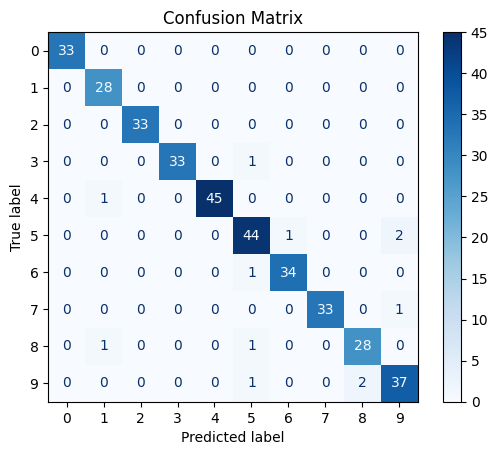

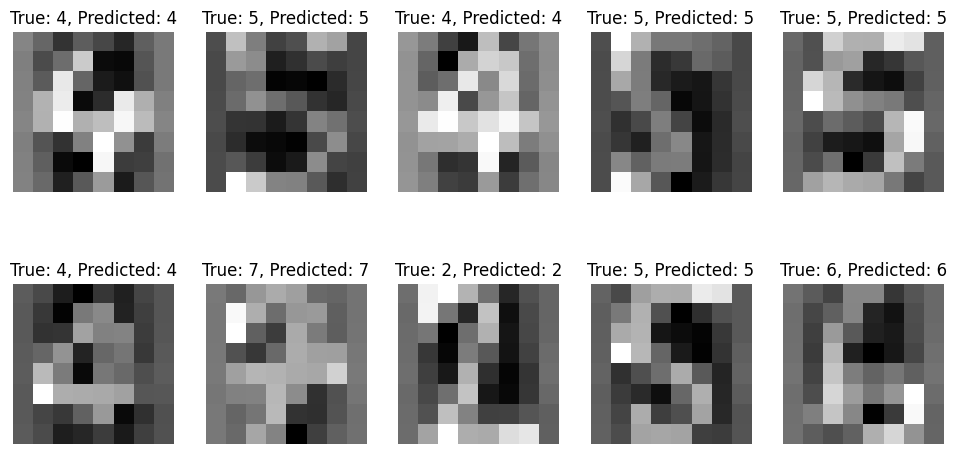

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Acquiring the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Segregating the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiating logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Deriving predictions on the test set
predictions_test = model.predict(X_test)

# Assessing the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Visualizing the Confusion Matrix using ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Displaying sample predictions
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices, 1:]  # Excluding the intercept term for plotting
sample_labels = y_test[sample_indices]
predicted_labels_sample = predictions_test[sample_indices]

# Plotting sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {sample_labels[i]}, Predicted: {predicted_labels_sample[i]}")
    ax.axis('off')

plt.show()

<i>The example below creates an interactive visualization using sliders to select the class for which you want to display the confusion matrix. Please ensure that you have the necessary dependencies installed (matplotlib, numpy, scikit-learn, ipywidgets). You can install ipywidgets using:<i>

```console 
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, widgets

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_test = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test)

# Function to plot confusion matrix for a specific class
def plot_confusion_matrix(class_idx):
    class_name = f'Class {class_idx}'
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {class_name}')

# Use ipywidgets interact to create a slider for class selection
interact(plot_confusion_matrix, class_idx=widgets.IntSlider(min=0, max=9, step=1, value=0))
plt.show()

Accuracy on the test set: 0.9666666666666667


interactive(children=(IntSlider(value=0, description='class_idx', max=9), Output()), _dom_classes=('widget-int…

In [ ]:
#Gradient Descent in Logistic Regression
q_gradient_descent_logistic_regression = [
    {
        "question": "What is the purpose of Gradient Descent in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To maximize the cost function",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent aims to minimize the cost function."
            },
            {
                "answer": "To minimize the cost function",
                "correct": True,
                "feedback": "Correct! Gradient Descent is used to find optimal values that minimize the cost function."
            },
            {
                "answer": "To find the global maximum of the cost function",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent searches for the global minimum of the cost function."
            },
            {
                "answer": "To perform feature scaling",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent is focused on optimizing the parameters to minimize the cost function."
            }
        ]
    },
    {
        "question": "What does the learning rate control in Gradient Descent?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The number of features",
                "correct": False,
                "feedback": "Incorrect. The learning rate regulates the step size during optimization."
            },
            {
                "answer": "The speed of convergence",
                "correct": True,
                "feedback": "Correct! The learning rate influences how quickly the algorithm converges."
            },
            {
                "answer": "The size of the dataset",
                "correct": False,
                "feedback": "Incorrect. The learning rate is independent of the dataset size."
            },
            {
                "answer": "The number of iterations",
                "correct": False,
                "feedback": "Incorrect. The learning rate does not control the number of iterations."
            }
        ]
    },
    {
        "question": "What is Batch Gradient Descent?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "It updates parameters using a random subset of the training data.",
                "correct": False,
                "feedback": "Incorrect. This describes Mini-Batch Gradient Descent."
            },
            {
                "answer": "It computes the gradient using the complete training dataset.",
                "correct": True,
                "feedback": "Correct! Batch Gradient Descent uses the entire training dataset for each iteration."
            },
            {
                "answer": "It updates parameters separately for every training example.",
                "correct": False,
                "feedback": "Incorrect. This describes Stochastic Gradient Descent (SGD)."
            },
            {
                "answer": "It only updates parameters once at the end of training.",
                "correct": False,
                "feedback": "Incorrect. Batch Gradient Descent updates parameters in each iteration."
            }
        ]
    }
]

# Display the questions
display_quiz(q_gradient_descent_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_cost_function_logistic_regression, "q_cost_function_logistic_regression")


<IPython.core.display.Javascript object>

'<span style="display:none" id="q_cost_function_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgZm91bmRhdGlvbmFsIGZ1bmN0aW9uIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJTaW5lIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGZvdW5kYXRpb24gb2YgbG9naXN0aWMgcmVncmVzc2lvbiBpcyB0aGUgbG9naXN0aWMgZnVuY3Rpb24gb3Igc2lnbW9pZCBmdW5jdGlvbiwgbm90IHRoZSBzaW5lIGZ1bmN0aW9uLiJ9LCB7ImFuc3dlciI6ICJMb2dpc3RpYyBmdW5jdGlvbiAoU2lnbW9pZCBmdW5jdGlvbikiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBMb2dpc3RpYyByZWdyZXNzaW9uIGlzIGJhc2VkIG9uIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgdGhlIHNpZ21vaWQgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkV4cG9uZW50aWFsIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGtleSBmdW5jdGlvbiBpbiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgbm90IHRoZSBleHBvbmVudGlhbCBmdW5jdGlvbi4ifSwgeyJhbnN3ZXIiOiAiTGluZWFyIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiB

# Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) stands as a prominent optimization algorithm widely employed in the realms of machine learning and statistical modeling. It is instrumental in the iterative minimization of the cost or loss function associated with a given model. Diverging from conventional Gradient Descent methodologies, which necessitate processing the entire dataset to compute the gradient of the cost function, SGD adopts a stochastic approach by randomly sampling individual data points or small batches. This stochasticity imparts distinct advantages, particularly in scenarios characterized by voluminous datasets.





<i>Below is an example Python code implementing Stochastic Gradient Descent (SGD) with visualizations using a synthetic dataset. This example uses the make_classification function from scikit-learn to create a two-class classification problem with two features for simplicity. The visualization includes decision boundaries over iterations.</i>

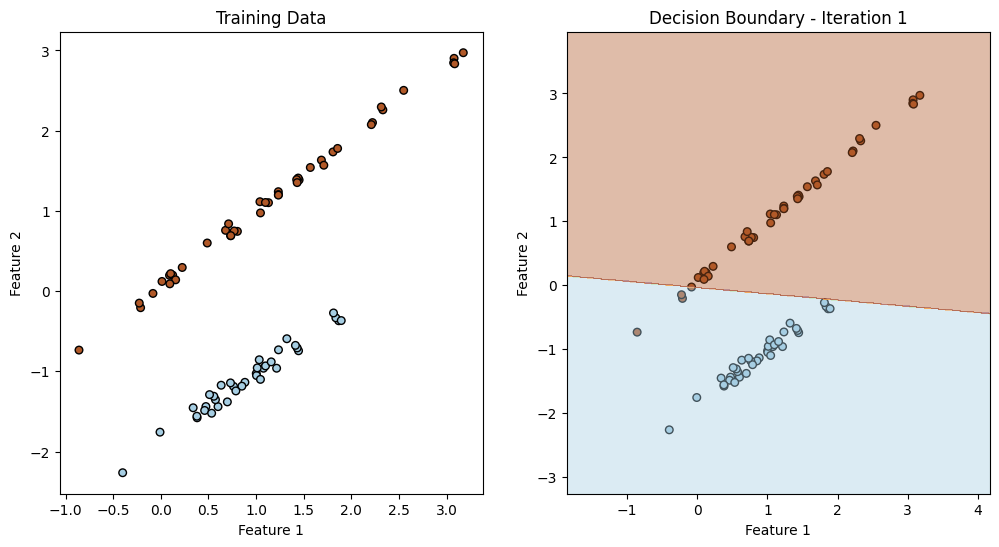

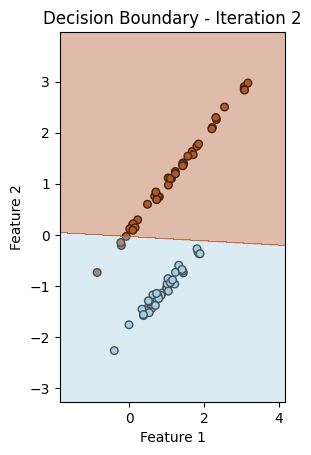

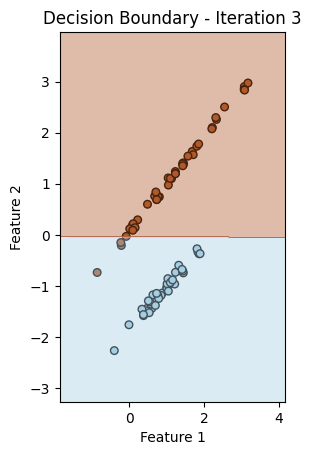

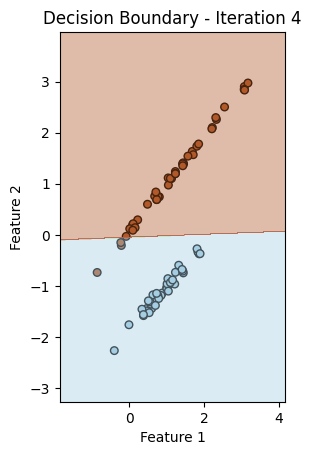

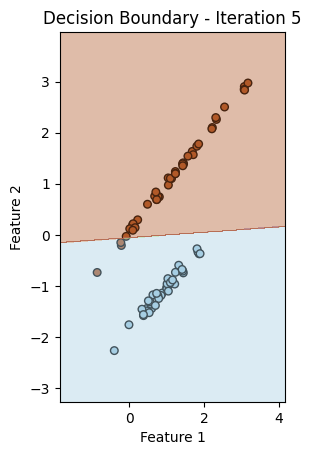

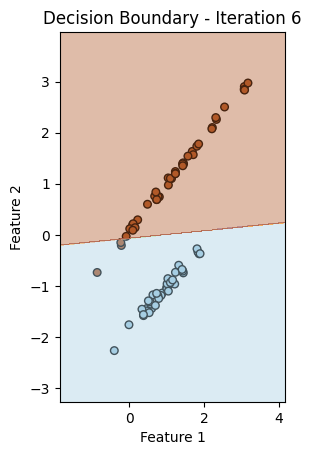

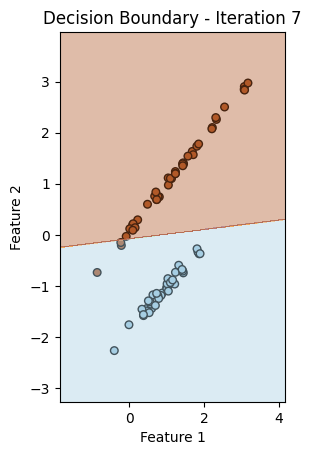

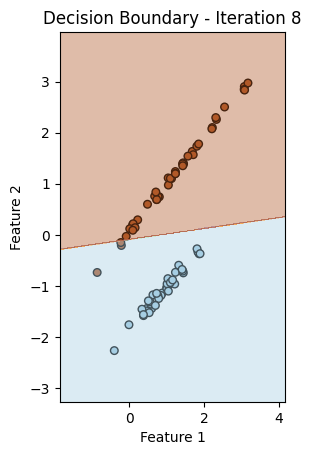

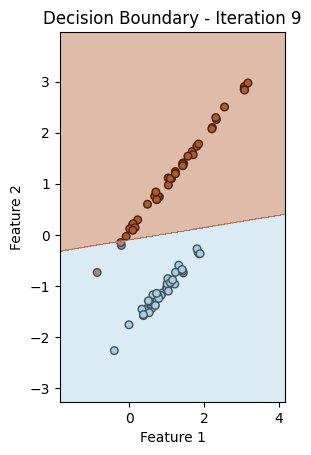

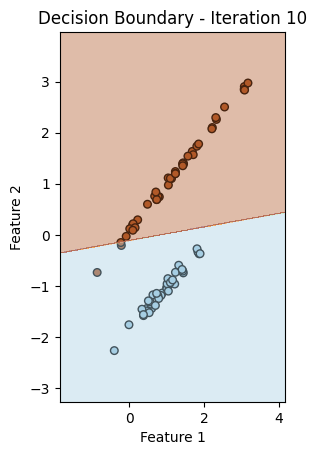

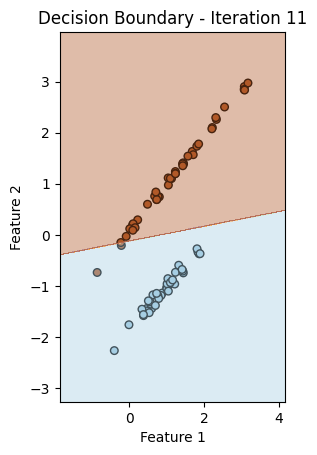

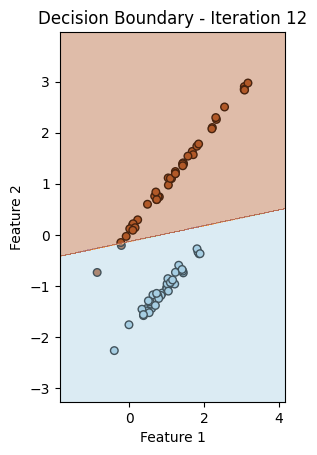

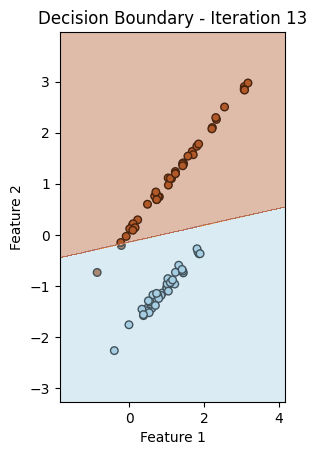

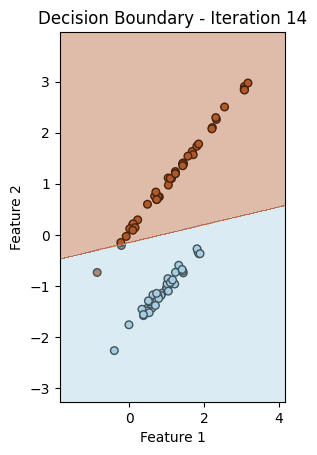

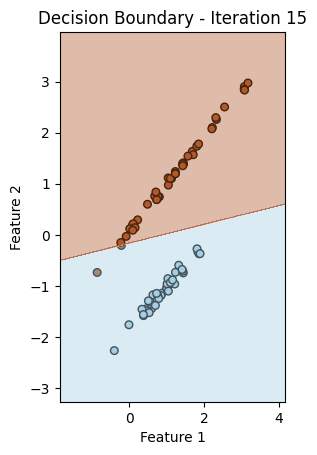

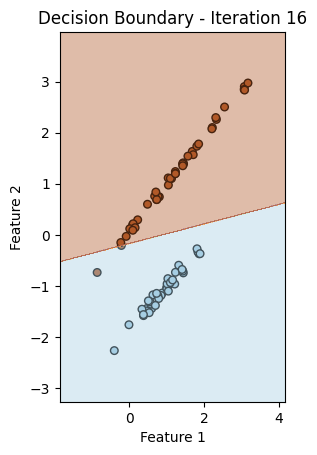

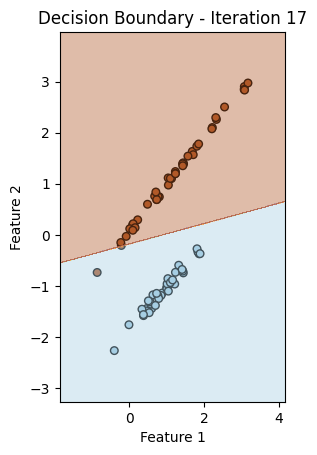

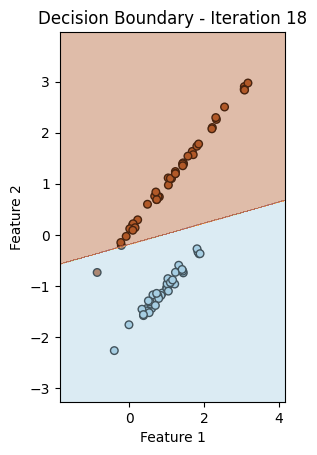

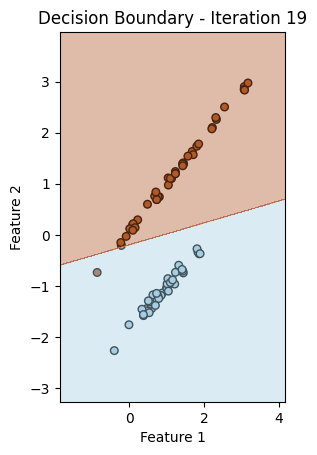

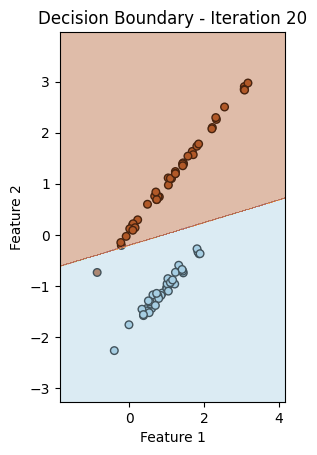

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', max_iter=100, learning_rate='constant', eta0=0.01, random_state=42)

# Visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=30)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Training the model and visualizing decision boundaries over iterations
n_iterations = 20
for iteration in range(n_iterations):
    clf.partial_fit(X_train, y_train, classes=np.unique(y))
    
    plt.subplot(1, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=30)
    
    # Plot decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
    
    plt.title(f'Decision Boundary - Iteration {iteration + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [ ]:
# Stochastic Gradient Descent (SGD) in Logistic Regression
q_sgd_logistic_regression = [
    {
        "question": "What is the key characteristic of Stochastic Gradient Descent (SGD) in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Parameters are updated after processing each individual training example",
                "correct": True,
                "feedback": "Correct! In SGD, the parameters are updated after processing each individual training example."
            },
            {
                "answer": "Parameters are updated based on the complete dataset",
                "correct": False,
                "feedback": "Incorrect. Parameter updates in SGD are based on each individual training example, not the complete dataset."
            },
            {
                "answer": "Parameters are updated in batches",
                "correct": False,
                "feedback": "Incorrect. Updating in batches is a characteristic of Mini-Batch Gradient Descent, not Stochastic Gradient Descent."
            },
            {
                "answer": "Parameters are updated only once per epoch",
                "correct": False,
                "feedback": "Incorrect. In SGD, parameters can be updated multiple times per epoch as each training example is processed."
            }
        ]
    },
    {
        "question": "What is the update rule for parameters in Stochastic Gradient Descent (SGD) for logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "$$ \\theta = \\theta - \\alpha \\nabla J_i(\\theta) $$",
                "correct": True,
                "feedback": "Correct! This is the correct update rule for parameters in Stochastic Gradient Descent, where $ \\nabla J_i(\\theta) $ is the gradient of the cost function for the $ i $-th training example."
            },
            {
                "answer": "$$ \\theta = \\theta - \\alpha \\nabla J(\\theta) $$",
                "correct": False,
                "feedback": "Incorrect. This update rule is for Batch Gradient Descent, not Stochastic Gradient Descent."
            },
            {
                "answer": "$$ \\theta = \\theta - \\alpha \\nabla J_{\\text{avg}}(\\theta) $$",
                "correct": False,
                "feedback": "Incorrect. This represents an average gradient, not the gradient for a single training example in SGD."
            },
            {
                "answer": "$$ \\theta = \\theta - \\alpha \\nabla J_{\\text{mini-batch}}(\\theta) $$",
                "correct": False,
                "feedback": "Incorrect. This update rule is for Mini-Batch Gradient Descent, not Stochastic Gradient Descent."
            }
        ]
    }
]

# Display the questions
display_quiz(q_sgd_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_sgd_logistic_regression, "q_sgd_logistic_regression")


<IPython.core.display.Javascript object>

'<span style="display:none" id="q_sgd_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUga2V5IGNoYXJhY3RlcmlzdGljIG9mIFN0b2NoYXN0aWMgR3JhZGllbnQgRGVzY2VudCAoU0dEKSBpbiBsb2dpc3RpYyByZWdyZXNzaW9uPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiUGFyYW1ldGVycyBhcmUgdXBkYXRlZCBhZnRlciBwcm9jZXNzaW5nIGVhY2ggaW5kaXZpZHVhbCB0cmFpbmluZyBleGFtcGxlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgSW4gU0dELCB0aGUgcGFyYW1ldGVycyBhcmUgdXBkYXRlZCBhZnRlciBwcm9jZXNzaW5nIGVhY2ggaW5kaXZpZHVhbCB0cmFpbmluZyBleGFtcGxlLiJ9LCB7ImFuc3dlciI6ICJQYXJhbWV0ZXJzIGFyZSB1cGRhdGVkIGJhc2VkIG9uIHRoZSBjb21wbGV0ZSBkYXRhc2V0IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gUGFyYW1ldGVyIHVwZGF0ZXMgaW4gU0dEIGFyZSBiYXNlZCBvbiBlYWNoIGluZGl2aWR1YWwgdHJhaW5pbmcgZXhhbXBsZSwgbm90IHRoZSBjb21wbGV0ZSBkYXRhc2V0LiJ9LCB7ImFuc3dlciI6ICJQYXJhbWV0ZXJzIGFyZSB1cGRhdGVkIGluIGJhdGNoZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBVcGRhdGluZyBpbiBiYXRjaGVzIGlzIGEgY2hhcmFjdGVyaXN0aWMgb2YgTWlua

# Evaluation and Comparison

To determine whether logistic regression models are useful for making predictions, it is essential to assess their performance. In logistic regression, evaluation and comparison entail determining how well the model performs as well as contrasting various models or variants of the same model. The following are typical techniques for assessing and contrasting logistic regression models:

## Metrics for Evaluation

### Accuracy

A popular metric for balanced datasets, accuracy quantifies the percentage of correctly classified instances.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

### Precision, Recall, and F1 Score

F1 score, recall, and precision offer additional information for unbalanced datasets. They have the following definition:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

$$ \text{F1 Score} = 2 \times \left(\frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}\right) $$

In [16]:
#Evaluation and Comparison in Logistic Regression

q_evaluation_comparison_logistic_regression = [
    {
        "question": "What does the Accuracy metric in logistic regression evaluate?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": True,
                "feedback": "Correct! Accuracy measures the percentage of correctly classified instances."
            },
            {
                "answer": "The ratio of true positives to the total number of predictions",
                "correct": False,
                "feedback": "Incorrect. This description corresponds more closely to precision."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to recall, not accuracy."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description refers to the F1 Score, not accuracy."
            }
        ]
    },
    {
        "question": "How is Precision defined in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "True Positives / (True Positives + False Positives)",
                "correct": True,
                "feedback": "Correct! Precision is calculated as True Positives divided by the sum of True Positives and False Positives."
            },
            {
                "answer": "True Positives / (True Positives + False Negatives)",
                "correct": False,
                "feedback": "Incorrect. This formula corresponds to recall, not precision."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to the F1 Score, not precision."
            },
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not precision."
            }
        ]
    },
    {
        "question": "What is the F1 Score in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not the F1 Score."
            },
            {
                "answer": "The ratio of true positives to the total number of predictions",
                "correct": False,
                "feedback": "Incorrect. This description corresponds more closely to precision."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": True,
                "feedback": "Correct! The F1 Score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance on unbalanced datasets."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to recall, not the F1 Score."
            }
        ]
    },
    {
        "question": "In logistic regression, what does Recall measure?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not recall."
            },
            {
                "answer": "True Positives / (True Positives + False Positives)",
                "correct": False,
                "feedback": "Incorrect. This formula corresponds to precision, not recall."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": True,
                "feedback": "Correct! Recall measures the ability of a model to capture all positive instances."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description refers to the F1 Score, not recall."
            }
        ]
    }
]

# Display the questions
display_quiz(q_evaluation_comparison_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_evaluation_comparison_logistic_regression, "q_evaluation_comparison_logistic_regression")


<IPython.core.display.Javascript object>

'<span style="display:none" id="q_evaluation_comparison_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBBY2N1cmFjeSBtZXRyaWMgaW4gbG9naXN0aWMgcmVncmVzc2lvbiBldmFsdWF0ZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBwZXJjZW50YWdlIG9mIGNvcnJlY3RseSBjbGFzc2lmaWVkIGluc3RhbmNlcyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIEFjY3VyYWN5IG1lYXN1cmVzIHRoZSBwZXJjZW50YWdlIG9mIGNvcnJlY3RseSBjbGFzc2lmaWVkIGluc3RhbmNlcy4ifSwgeyJhbnN3ZXIiOiAiVGhlIHJhdGlvIG9mIHRydWUgcG9zaXRpdmVzIHRvIHRoZSB0b3RhbCBudW1iZXIgb2YgcHJlZGljdGlvbnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGlzIGRlc2NyaXB0aW9uIGNvcnJlc3BvbmRzIG1vcmUgY2xvc2VseSB0byBwcmVjaXNpb24uIn0sIHsiYW5zd2VyIjogIlRoZSByYXRpbyBvZiB0cnVlIHBvc2l0aXZlcyB0byB0aGUgc3VtIG9mIHRydWUgcG9zaXRpdmVzIGFuZCBmYWxzZSBuZWdhdGl2ZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGlzIGRlc2NyaXB0aW9uIGNvcnJlc3BvbmRzIHRvIHJlY2FsbCwgbm90IGFjY3VyYWN5LiJ9LCB7ImFuc3dlciI6ICJUaGUgaGFybW9uaWMgbWVhbiBvZiBwcmV